# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [272]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [273]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [274]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [275]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
group_data = to_data.groupby("year").sum()

group_data

# YOUR CODE HERE!

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040,40583604,118563,152031
2006,266860,379400,165,69430,54690,44095,162850,1335,59368353,184352,129558
2011,274940,429220,100,72480,60355,44750,163895,2165,74259461,202750,142771
2016,269680,493270,95,71200,61565,48585,165575,2845,92969566,246584,175885


In [276]:
# Save the dataframe as a csv file
group_data.to_csv('Data/house_data.csv')

# YOUR CODE HERE!

In [277]:
file_path2 = Path("Data/house_data.csv")
house_data = pd.read_csv(file_path2, index_col="year")

house_data


,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040,40583604,118563,152031
2006,266860,379400,165,69430,54690,44095,162850,1335,59368353,184352,129558
2011,274940,429220,100,72480,60355,44750,163895,2165,74259461,202750,142771
2016,269680,493270,95,71200,61565,48585,165575,2845,92969566,246584,175885


In [278]:
house_data = house_data.drop(['average_house_value','shelter_costs_owned','shelter_costs_rented'],axis=1)
house_data

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [279]:
years = list(house_data.index)
years

[2001, 2006, 2011, 2016]

In [280]:
house = house_data.loc[2001,:]

In [281]:
# Helper create_bar_chart function
# Create a bar chart per year to show the number of dwelling types
# Bar chart for 2001
# Bar chart for 2006
# Bar chart for 2011
# Bar chart for 2016
def create_bar_chart(data, title, ylabel, color):
    fig = data.hvplot.bar(title=title, ylabel=ylabel, rot=90,height=400, width=500,color=color)
    return fig

row_of_chart = pn.Row()
#loop through the years to plot all 4 bar charts, ranging from 2001 - 2016
for year in years:
    data = house_data.loc[year,:]
    figure = create_bar_chart(data,f"Dwelling Types in Toronto in {year}",'Dwelling Type Units','c')
    row_of_chart.append(figure)
    #figure = create_bar_chart(data, "Dwelling Types", ylabel, color)
    
row_of_chart

Row
    [0] HoloViews(Bars)
    [1] HoloViews(Bars)
    [2] HoloViews(Bars)
    [3] HoloViews(Bars)

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [282]:
# Calculate the average monthly shelter costs for owned and rented dwellings
cost_raw_data = to_data.groupby("year").mean()

cost_raw_data.loc[:,['shelter_costs_owned', 'shelter_costs_rented']]

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [283]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    fig = data.hvplot.line(title=title, xlabel=xlabel, ylabel=ylabel, rot=90,height=400, width=500,color=color)
    return fig

In [284]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year
# Line chart for owned dwellings
shelter_owned = cost_raw_data.loc[:,"shelter_costs_owned"]/12
average_monthly_cost_owned = create_line_chart(shelter_owned,"Monthly Shelter Costs for Owned Dwelling","year","shelter_costs_owned",'c')
# Line chart for rented dwellings
shelter_rented = cost_raw_data.loc[:,"shelter_costs_rented"]/12
average_monthly_cost_rented = create_line_chart(shelter_rented,"Monthly Shelter Costs for Rented Dwelling","year","shelter_costs_rented",'c')

row_of_parallel = pn.Row(average_monthly_cost_owned, average_monthly_cost_rented)
row_of_parallel

Row
    [0] HoloViews(Curve)
    [1] HoloViews(Curve)

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [285]:
# Calculate the average house value per year
average_data = to_data.groupby("year").mean()
av_house_value = average_data.loc[:,'average_house_value']

av_house_value

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

In [286]:
# Plot the average house value per year as a line chart

create_line_chart(av_house_value, "Average House Value per year", "year", "Average House Value", 'c')

:Curve   [year]   (average_house_value)

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [287]:
# Create a new DataFrame with the mean house values by neighbourhood per year
reset_to_data = to_data.reset_index()

neigh_df = reset_to_data.loc[:,["year","neighbourhood","average_house_value"]]
new_data = neigh_df.set_index("year")
new_data


,neighbourhood,average_house_value
year,,
2001,Agincourt North,200388
2001,Agincourt South-Malvern West,203047
2001,Alderwood,259998
2001,Annex,453850
2001,Banbury-Don Mills,371864
...,...,...
2016,Wychwood,787760
2016,Yonge-Eglinton,1127052
2016,Yonge-St.Clair,1131888


In [288]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
new_data.hvplot.line(title="Average House Value per Neighbourhood", xlabel="year",ylabel="average house value",groupby = "neighbourhood", rot=90,height=400, width=500,color='c')


:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

In [289]:
# Fetch the data of all dwelling types per year

dwelling_data = to_data.drop(['average_house_value','shelter_costs_owned','shelter_costs_rented'],axis=1).reset_index()

dwelling_data




,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0
2,2001,Alderwood,3175,315,0,470,50,185,370,0
3,2001,Annex,1060,6090,5,1980,605,275,3710,165
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0
...,...,...,...,...,...,...,...,...,...,...
555,2016,Wychwood,920,1295,0,880,290,395,2080,35
556,2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0
557,2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0
558,2016,York University Heights,1235,5505,0,1360,775,280,995,0


In [290]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# grouping all type of dwellings in a list
dwelling_list = [
    'single_detached_house',
    'apartment_five_storeys_plus',
    'movable_dwelling',
    'semi_detached_house',
    'row_house',
    'duplex',
    'apartment_five_storeys_less',
    'other_house'
]

# sum up dwelling types and store data in a new column
dwelling_data['Dwelling Sum'] = dwelling_data[dwelling_list].sum(axis=1)

# remove individual dwelling columns
final_dwel_data = dwelling_data.drop(dwelling_list,axis=1)
final_dwel_data 


,year,neighbourhood,Dwelling Sum
0,2001,Agincourt North,7930
1,2001,Agincourt South-Malvern West,6615
2,2001,Alderwood,4565
3,2001,Annex,13890
4,2001,Banbury-Don Mills,10075
...,...,...,...
555,2016,Wychwood,5895
556,2016,Yonge-Eglinton,5675
557,2016,Yonge-St.Clair,7005
558,2016,York University Heights,10150


In [291]:
# The plot should have a dropdown selector for the neighbourhood
dwel_plot = final_dwel_data.set_index("year")

dwel_plot.hvplot.bar(title="Number of Dwelling Types per year", xlabel="year",ylabel="Sum of Dwelling Types",groupby = "neighbourhood", rot=90,height=400, width=500,color='c')

:DynamicMap   [neighbourhood]
   :Bars   [year]   (Dwelling Sum)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [412]:
# Getting the data from the top 10 expensive neighbourhoods

neigh_df
value_df = neigh_df.groupby(["neighbourhood"]).mean().drop("year",axis=1)
top10_DF = value_df.nlargest(n=10, columns=['average_house_value'])
top10_df

,average_house_value
neighbourhood,
Bridle Path-Sunnybrook-York Mills,1526485.75
Forest Hill South,1195992.50
Lawrence Park South,1094027.75
Rosedale-Moore Park,1093640.00
St.Andrew-Windfields,999107.00
Casa Loma,981064.25
Bedford Park-Nortown,930415.25
Forest Hill North,851680.50
Kingsway South,843234.25


In [413]:
# Plotting the data from the top 10 expensive neighbourhoods
top10_df.hvplot.bar(title="Top 10 Expensive Neighbourhoods", xlabel="Neighbourhood",ylabel="average house value", rot=90,height=400,width=500,color='c')


:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [295]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718
...,...,...,...
135,Wychwood,43.676919,-79.425515
136,Yonge-Eglinton,43.704689,-79.403590
137,Yonge-St.Clair,43.687859,-79.397871
138,York University Heights,43.765736,-79.488883


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [296]:
# Calculate the mean values for each neighborhood
value_df

,average_house_value
neighbourhood,
Bridle Path-Sunnybrook-York Mills,1526485.75
Forest Hill South,1195992.50
Lawrence Park South,1094027.75
Rosedale-Moore Park,1093640.00
St.Andrew-Windfields,999107.00
...,...
Malvern,256880.25
Thorncliffe Park,255264.75
Mount Olive-Silverstone-Jamestown,253182.25


In [297]:
#reset index before concatenation
a = df_neighbourhood_locations.set_index('neighbourhood')
a

,lat,lon
neighbourhood,,
Agincourt North,43.805441,-79.266712
Agincourt South-Malvern West,43.788658,-79.265612
Alderwood,43.604937,-79.541611
Annex,43.671585,-79.404001
Banbury-Don Mills,43.737657,-79.349718
...,...,...
Wychwood,43.676919,-79.425515
Yonge-Eglinton,43.704689,-79.403590
Yonge-St.Clair,43.687859,-79.397871


In [298]:
# Join the average values with the neighbourhood locations

combined_raw_data = pd.concat([a, value_df],axis='columns', join="inner")
combined_raw_data

,lat,lon,average_house_value
neighbourhood,,,
Agincourt North,43.805441,-79.266712,329811.50
Agincourt South-Malvern West,43.788658,-79.265612,334189.00
Alderwood,43.604937,-79.541611,427922.50
Annex,43.671585,-79.404001,746977.00
Banbury-Don Mills,43.737657,-79.349718,612039.00
...,...,...,...
Wychwood,43.676919,-79.425515,565976.50
Yonge-Eglinton,43.704689,-79.403590,809745.75
Yonge-St.Clair,43.687859,-79.397871,813220.25


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [299]:
# Create a scatter mapbox to analyze neighbourhood info

map_data = combined_raw_data.reset_index()
# Set the Mapbox API

load_dotenv()


True

In [300]:
map_box_api = os.getenv("map_box_api")
px.set_mapbox_access_token(map_box_api)

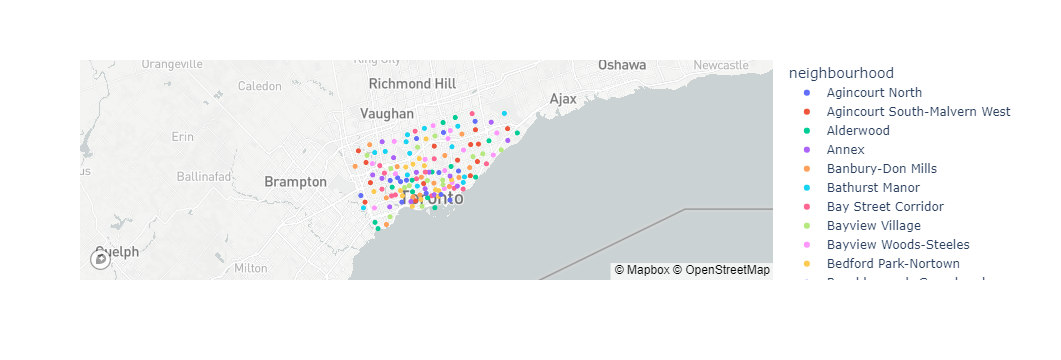

In [301]:
# Slice and plot data by name
map_1 = px.scatter_mapbox(
    map_data,
    lat="lat",
    lon="lon",
    color="neighbourhood"
)

map_1.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [356]:
neigh_df

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864
...,...,...,...
555,2016,Wychwood,787760
556,2016,Yonge-Eglinton,1127052
557,2016,Yonge-St.Clair,1131888
558,2016,York University Heights,425769


### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [365]:
# Fetch the data from all expensive neighbourhoods per year.
neigh_df

years = list(house_data.index)
years


[2001, 2006, 2011, 2016]

In [390]:
df = pd.DataFrame()

In [405]:
#only extracting top 10 most expensive neighbourhood from every year

for year in years:
    data_extract = neigh_df[neigh_df["year"] == year]
    data_df = data_extract.set_index("neighbourhood").nlargest(n=10, columns=['average_house_value'])
    df = df.append(data_df)

sunburst_df = df.reset_index()
sunburst_df 

,neighbourhood,year,average_house_value
0,Bridle Path-Sunnybrook-York Mills,2001,927466
1,Forest Hill South,2001,726664
2,Lawrence Park South,2001,664712
3,Rosedale-Moore Park,2001,664476
4,St.Andrew-Windfields,2001,607040
...,...,...,...
155,Casa Loma,2016,1365503
156,Bedford Park-Nortown,2016,1295007
157,Forest Hill North,2016,1185419
158,Kingsway South,2016,1173663


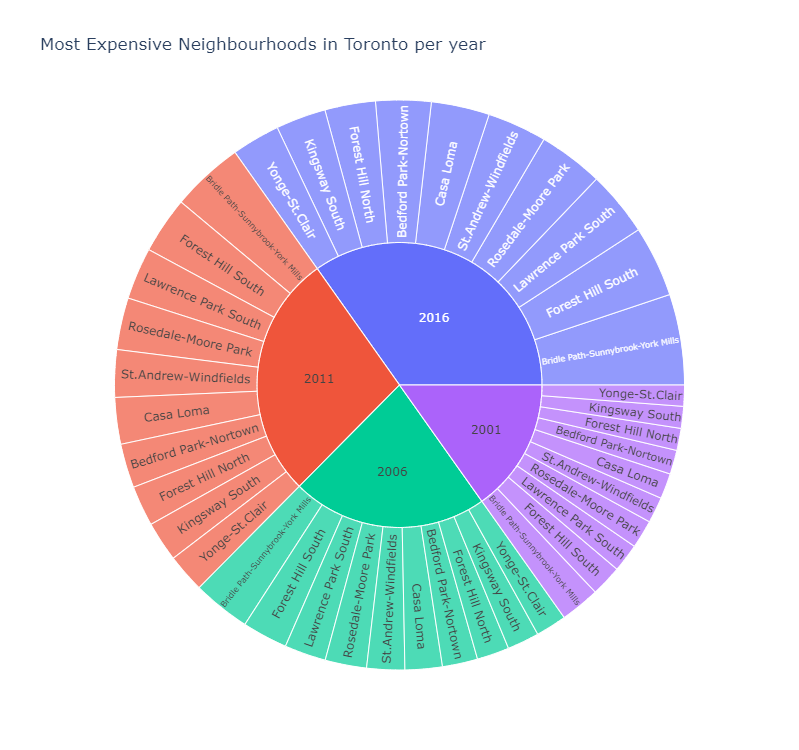

In [409]:
# Create the sunburst chart
fig = px.sunburst(sunburst_df,
                  path=['year', 'neighbourhood'],
                  values='average_house_value',
                  title="Most Expensive Neighbourhoods in Toronto per year",
                  width=750, height=750)
fig.show()